In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the data from csv file (train and test)
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
#showing first 5 rows of dataset
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#same
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Utilities
# Neighborhood
# OverallQual
# YearBuilt
# ExterQual
# ExterCond
# Foundation
# Electrical
# KitchenQual
# GarageType
# GarageFinish
# Fence

In [6]:
#merging both train and test dataset
df=pd.concat([df1,df2])
print('Shape of the Data set =',df.shape)

Shape of the Data set = (2919, 81)


In [7]:
#usefull info of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [8]:
#features with most null values 
# Alley
# FireplaceQu
# PoolQC
# Fence
# MiscFeature

In [9]:
#checking the names of columns with int64 values
int_features=df.select_dtypes(include=['int64']).columns
print("Number of Integer Features: ", int_features.shape[0])
print(int_features.to_list())

Number of Integer Features:  26
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [10]:
#checking the names of columns with float64 values
float_features=df.select_dtypes(include=['float64']).columns
print("Number of Integer Features: ", float_features.shape[0])
print(float_features.to_list())

Number of Integer Features:  12
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [11]:
#checking the names of column with object type
cat_features=df.select_dtypes(include=['object']).columns
print("Number of Integer Features: ", cat_features.shape[0])
print(cat_features.to_list())

Number of Integer Features:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
#This function performs the statistic operations on numerical values of data set
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Handling the missing Values

In [13]:
#importing packages
import matplotlib.pyplot as plt
import seaborn as sns

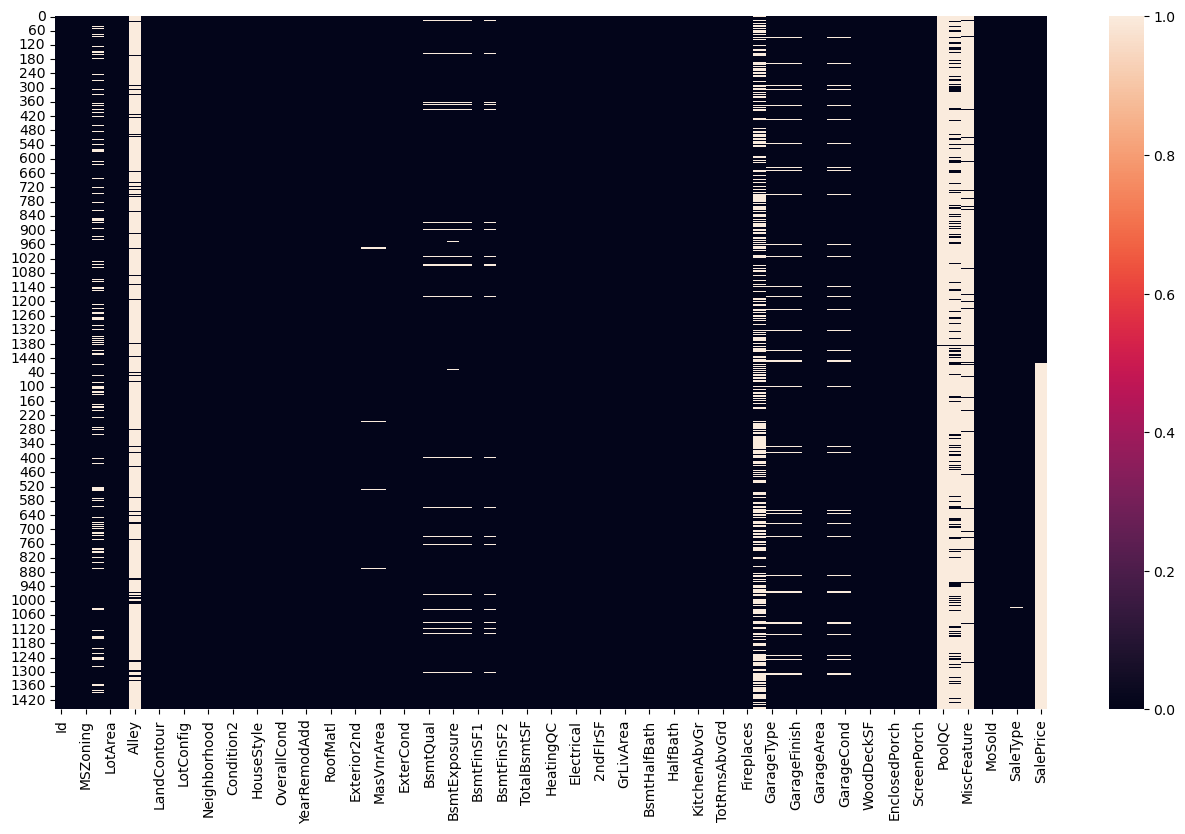

In [14]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig('Null Value Heat Map.jpg')

In [15]:
df.set_index('Id').head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [16]:
total_null=df.isnull().sum()
pd.set_option('display.max_rows', None)
len(total_null)

81

In [17]:
null_per=df.isnull().sum()/df.shape[0]*100
pd.set_option('display.max_rows', None)
null_per


Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [18]:
null_per[null_per>50]

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [19]:
first=null_per[(null_per>20) & (null_per<50)]
first

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [20]:
second=null_per[(null_per>5) & (null_per<21)]
second

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

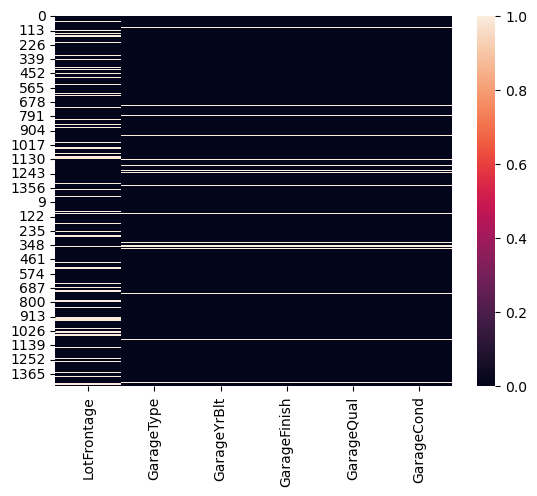

In [21]:
sns.heatmap(df[second.keys()].isnull())
plt.savefig('Null Value Heat Map 2.jpg')

WE JUST FILL THE VALUES WHICH ARE SMALLER THAN 5 AND GREATER THAN ZERO AND THERE IS NO NEED TO DROP ANY COLUMNS AS PER DOMAIN KNOWLEDGE

In [22]:
third=null_per[(null_per>0)&(null_per<=5)]
third.head()

MSZoning       0.137033
Utilities      0.068517
Exterior1st    0.034258
Exterior2nd    0.034258
MasVnrType     0.822199
dtype: float64

# Missing Val Imputation

In [23]:
null_val=null_per[null_per>0]
len(null_val)

35

In [24]:
cat_null=null_val[null_val.keys().isin(cat_features)]
print(cat_null,len(cat_null))

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64 23


In [25]:
float_null=null_val[null_val.keys().isin(float_features)]
print(float_null,len(float_null))

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64 12


In [26]:
int_null=null_val[null_val.keys().isin(int_features)]
int_null

Series([], dtype: float64)

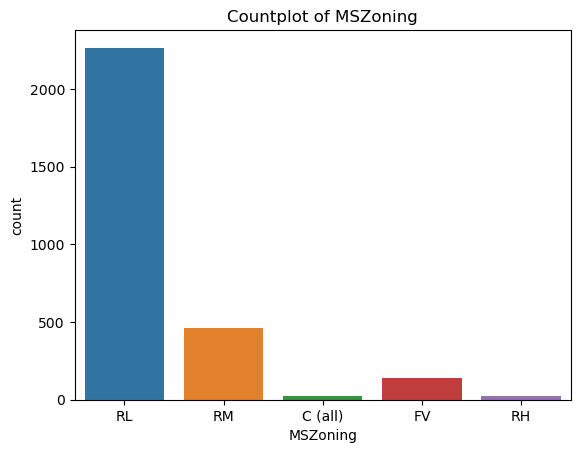

In [27]:
df["MSZoning"].value_counts()
sns.countplot(data=df, x="MSZoning")
plt.title("Countplot of MSZoning")
plt.show()

In [28]:
df_copy=df.copy()

In [29]:
mszoning=df["MSZoning"].mode()[0]
df_copy["MSZoning"].replace(np.nan,mszoning,inplace=True)

In [30]:
df_copy["MSZoning"].isnull().sum()

0

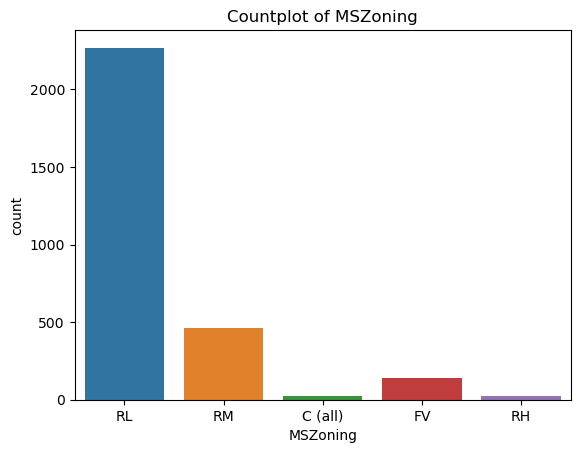

In [31]:
df_copy["MSZoning"].value_counts()
sns.countplot(data=df_copy, x="MSZoning")
plt.title("Countplot of MSZoning")
plt.show()

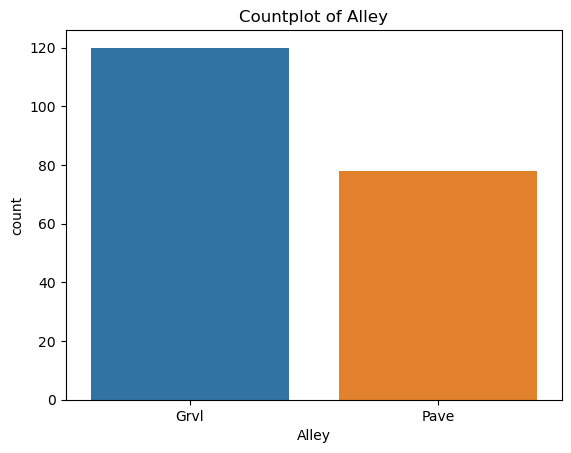

In [32]:
df["Alley"].value_counts()
sns.countplot(data=df, x="Alley")
plt.title("Countplot of Alley")
plt.show()

In [33]:
alley="NA"
df_copy["Alley"].replace(np.nan,alley,inplace=True)

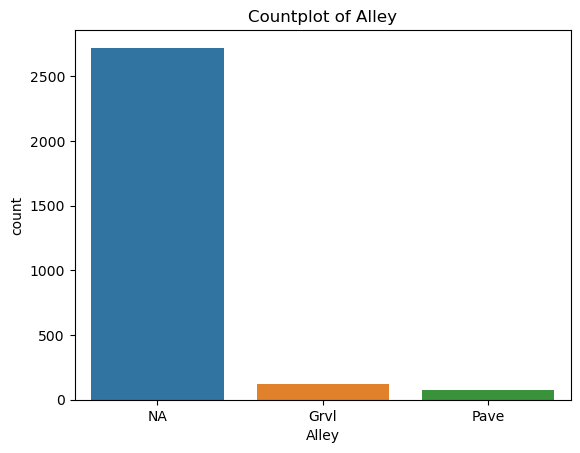

In [34]:
df_copy["Alley"].value_counts()
sns.countplot(data=df_copy, x="Alley")
plt.title("Countplot of Alley")
plt.show()

In [35]:
def boxplot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Zain\AppData\Local\Temp\ipykernel_6176\4005741796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


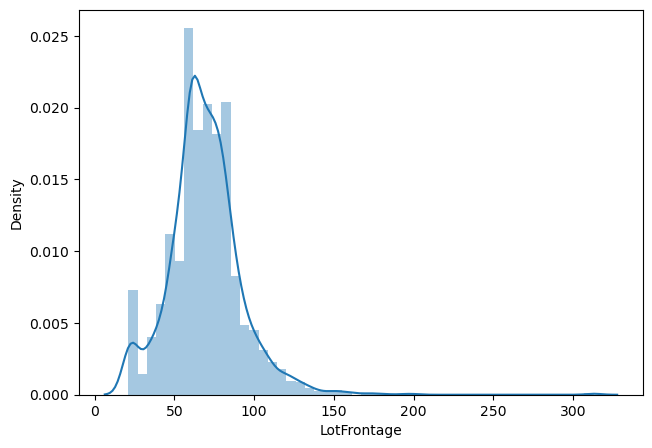

In [36]:
boxplot(df["LotFrontage"])

In [37]:
lotfrontage=df["LotFrontage"].mean()
df_copy["LotFrontage"].replace(np.nan,lotfrontage,inplace=True)
df_copy["LotFrontage"].isnull().sum()

0

C:\Users\Zain\AppData\Local\Temp\ipykernel_6176\4005741796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


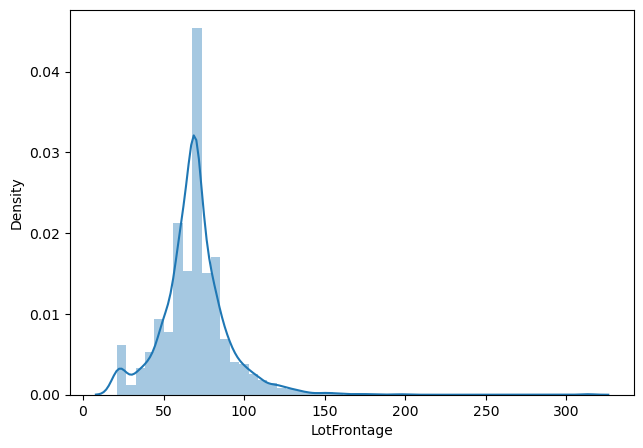

In [38]:
boxplot(df_copy["LotFrontage"])

In [39]:
utilities=df["Utilities"].value_counts().min()
df_copy["Utilities"].replace(np.nan,utilities,inplace=True)
df_copy["Utilities"].isnull().sum()

0

In [40]:
#Exterior1st and #Exterior2nd
exterior1st=df["Exterior1st"].mode()[0]
exterior1st
df_copy["Exterior1st"].replace(np.nan,exterior1st,inplace=True)
print(df_copy["Exterior1st"].isnull().sum())
exterior2nd=df["Exterior2nd"].mode()[0]
df_copy["Exterior2nd"].replace(np.nan,exterior2nd,inplace=True)
print(df_copy["Exterior2nd"].isnull().sum())

0
0


<Axes: >

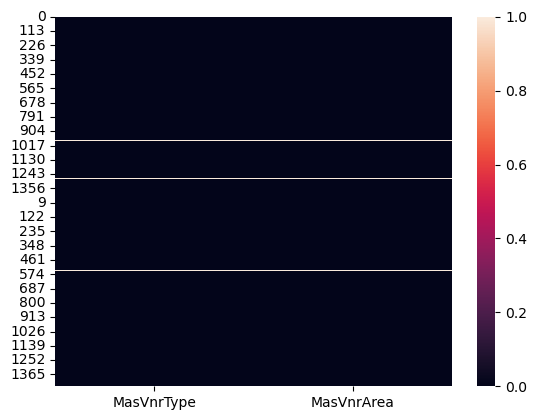

In [41]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull() )

In [42]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
231,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
246,1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,NaN


In [43]:


df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [44]:
masvnrtype=df["MasVnrType"].mode()[0]
df_copy["MasVnrType"].replace(np.nan,masvnrtype,inplace=True)
print(df_copy["MasVnrType"].isnull().sum())

0


C:\Users\Zain\AppData\Local\Temp\ipykernel_6176\4005741796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


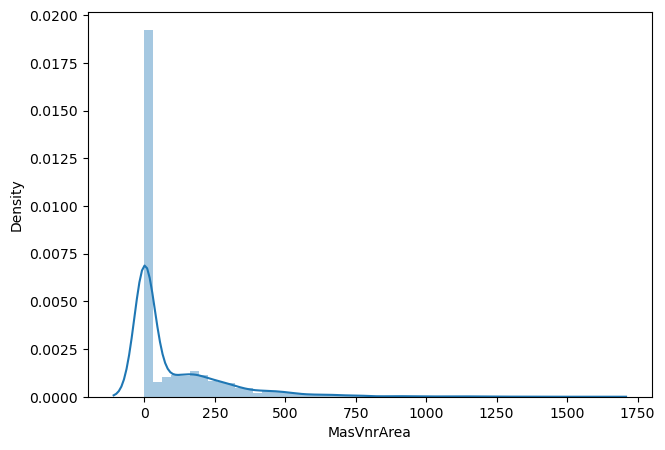

In [45]:
boxplot(df["MasVnrArea"])

In [46]:
const=0
df_copy["MasVnrArea"].replace(np.nan,const,inplace=True)
df_copy["MasVnrArea"].isna().sum()

0

In [47]:
basement_feature=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]


basement_feature2=["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

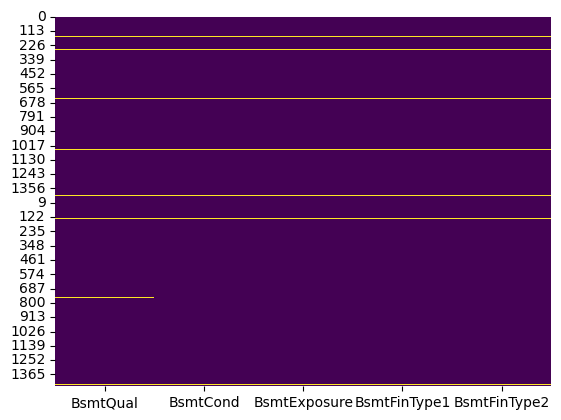

In [48]:
sns.heatmap(df[basement_feature].isnull(), cbar=False, cmap='viridis')
plt.show()

In [49]:
for feat in basement_feature:
    print(f"Value count of {feat} : {df[feat].value_counts()}")

Value count of BsmtQual : TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond : TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure : No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1 : Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2 : Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [50]:
const2=0
for feat in basement_feature:
    df_copy[feat].replace(np.nan,const2,inplace=True)

In [51]:
df_copy[basement_feature].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

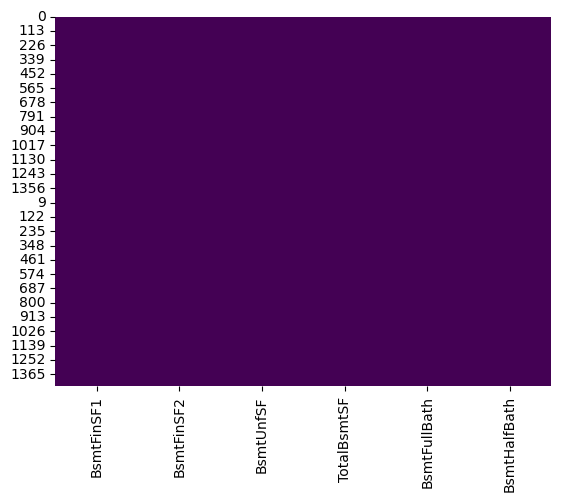

In [52]:
sns.heatmap(df[basement_feature2].isnull(), cbar=False, cmap='viridis')
plt.show()

In [53]:
df_bsmnt=df[basement_feature+basement_feature2]
df_bsmnt[df_bsmnt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
332,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
bsmnt_num=0
for feat in basement_feature2:
    df_copy[feat].replace(np.nan,bsmnt_num,inplace=True)

In [55]:
df_copy[basement_feature2].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [56]:
# Electrical       0.034258
# KitchenQual      0.034258

In [57]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [58]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [59]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [60]:
electrical=df["Electrical"].mode()[0]
df_copy["Electrical"].replace(np.nan,electrical,inplace=True)
print(df_copy["Electrical"].isnull().sum())
kitchqual=df["KitchenQual"].mode()[0]
df_copy["KitchenQual"].replace(np.nan,kitchqual,inplace=True)
print(df_copy["KitchenQual"].isnull().sum())

0
0


In [61]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [62]:
functional=df["Functional"].mode()[0]
df_copy["Functional"].replace(np.nan,functional,inplace=True)
print(df_copy["Functional"].isnull().sum())

0


In [63]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [64]:
saletype=df["SaleType"].mode()[0]
df_copy["SaleType"].replace(np.nan,saletype,inplace=True)
print(df_copy["SaleType"].isnull().sum())

0


In [65]:
other_cat_feat=["FireplaceQu",
"PoolQC",        
"Fence",     
"MiscFeature" ]
for feat in other_cat_feat:
   print(f"Value count of {feat} : {df[feat].value_counts()}") 

Value count of FireplaceQu : Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of PoolQC : Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence : MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of MiscFeature : Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [66]:
fireplace1u="NA"
df_copy["FireplaceQu"].replace(np.nan,fireplace1u,inplace=True)
print(df_copy["FireplaceQu"].isnull().sum())

saletype=df["SaleType"].mode()[0]
df_copy["SaleType"].replace(np.nan,saletype,inplace=True)
print(df_copy["SaleType"].isnull().sum())

saletype=df["SaleType"].mode()[0]
df_copy["SaleType"].replace(np.nan,saletype,inplace=True)
print(df_copy["SaleType"].isnull().sum())

0
0
0


In [67]:
# GarageType      
# GarageFinish     
# GarageQual       
# GarageCond       

# GarageYrBlt      
# GarageCars      
# GarageArea   

In [68]:
garage_cat=["GarageType","GarageFinish","GarageQual","GarageCond"]  
garage_num=["GarageYrBlt","GarageCars","GarageArea"]
garage_feat=df[garage_cat+garage_num]
garage_feat[garage_feat.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
99,NaN,NaN,NaN,NaN,NaN,0.0,0.0
108,NaN,NaN,NaN,NaN,NaN,0.0,0.0
125,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127,NaN,NaN,NaN,NaN,NaN,0.0,0.0
140,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [69]:
garagecat="NA"
for feat in garage_cat:
    df_copy[feat].replace(np.nan,garagecat,inplace=True)
df_copy[garage_cat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [70]:
garagenum=0
for feat in garage_num:
    df_copy[feat].replace(np.nan,garagenum,inplace=True)
df_copy[garage_num].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [71]:
df_copy.isnull().any(axis=1).sum()

2918

In [72]:
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [73]:
# PoolQC
# Fence
# MiscFeature
poolqc="NA"
df_copy["PoolQC"].replace(np.nan,poolqc,inplace=True)
df_copy["PoolQC"].isnull().sum()

0

In [74]:
fence="NA"
df_copy["Fence"].replace(np.nan,fence,inplace=True)
df_copy["Fence"].isnull().sum()

0

In [75]:
miscfeature="NA"
df_copy["MiscFeature"].replace(np.nan,miscfeature,inplace=True)
df_copy["MiscFeature"].isnull().sum()

0

In [76]:
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [77]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [78]:
df_copy = df_copy.drop("Id", axis=1)

In [79]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [80]:
num_to_str=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]
for feat in num_to_str:
    df_copy[feat]=df_copy[feat].astype(str)

In [125]:
#checking the names of columns with int64 values
cat_features=df_copy.select_dtypes(include=['object']).columns
print("Number of Categorical Features: ", cat_features.shape[0])
cat=cat_features.to_list()
print(cat)
#checking the names of columns with int64 values
float_features=df_copy.select_dtypes(include=['float64']).columns
print("Number of float Features: ", float_features.shape[0])
ff=float_features.to_list()
print(ff)
#checking the names of columns with int64 values
int_features=df_copy.select_dtypes(include=['int64']).columns
print("Number of Integer Features: ", int_features.shape[0])
inf=int_features.to_list()
print(inf)

Number of Categorical Features:  48
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition']
Number of float Features:  11
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'SalePrice']
Number of Integer Features:  21
['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 

In [126]:

columns_to_convert = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition']
df_copy[columns_to_convert] = df[columns_to_convert].astype('object')


In [127]:
num_feat=ff+inf
num_feat

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [246]:
import sklearn.preprocessing as pre_pro
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
onehot_encoder=pre_pro.OneHotEncoder()
standard_scaler=pre_pro.StandardScaler()
transform_x=make_column_transformer((onehot_encoder,['MSSubClass', 'MSZoning', 'Street', 'Alley',
                                                     'LotShape', 'LandContour', 'Utilities',
                                                     'LotConfig', 'LandSlope', 'Neighborhood',
                                                     'Condition1', 'Condition2', 'BldgType',
                                                     'HouseStyle', 'YearBuilt', 'YearRemodAdd',
                                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                                     'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                                                     'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                                                     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                     'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt','GarageFinish',
                                                     'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                                                     'MiscFeature', 'YrSold', 'SaleType', 'SaleCondition']),(standard_scaler,['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']))

In [247]:
df_train=df_copy.iloc[:1460, :]
df_train.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0


In [248]:
X=df_train.iloc[:,0:79]
X.head(0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [249]:
processed_x = transform_x.fit_transform(X)

In [250]:
Y=df_train.iloc[:,79]
Y = tf.convert_to_tensor(Y, dtype=tf.float32)

In [251]:
processed_y=np.c_[Y]
processed_y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]], dtype=float32)

In [252]:
validation_split = 0.2
x_train, x_val, y_train, y_val = train_test_split(processed_x, processed_y, test_size=validation_split, random_state=42)

In [253]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=590 , activation='relu'))
model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(32 , activation='relu'))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(8 , activation='relu'))
model.add(layers.Dense(4 , activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 512)               302592    
                                                                 
 dense_103 (Dense)           (None, 256)               131328    
                                                                 
 dense_104 (Dense)           (None, 128)               32896     
                                                                 
 dense_105 (Dense)           (None, 64)                8256      
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 16)                528       
                                                                 
 dense_108 (Dense)           (None, 8)               

In [254]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [255]:
history=model.fit(processed_x,processed_y,epochs=30,validation_data=(x_val, y_val), batch_size=32)

Epoch 1/30
46/46 [==============================] - 4s 19ms/step - loss: 38742343680.0000 - mse: 38742343680.0000 - val_loss: 36868538368.0000 - val_mse: 36868538368.0000
Epoch 2/30
46/46 [==============================] - 0s 11ms/step - loss: 13793895424.0000 - mse: 13793895424.0000 - val_loss: 2778854400.0000 - val_mse: 2778854400.0000
Epoch 3/30
46/46 [==============================] - 0s 11ms/step - loss: 1542244480.0000 - mse: 1542244480.0000 - val_loss: 1460682240.0000 - val_mse: 1460682240.0000
Epoch 4/30
46/46 [==============================] - 0s 11ms/step - loss: 1221850624.0000 - mse: 1221850624.0000 - val_loss: 1194684416.0000 - val_mse: 1194684416.0000
Epoch 5/30
46/46 [==============================] - 0s 10ms/step - loss: 1133670272.0000 - mse: 1133670272.0000 - val_loss: 1098713472.0000 - val_mse: 1098713472.0000
Epoch 6/30
46/46 [==============================] - 0s 11ms/step - loss: 1029816832.0000 - mse: 1029816832.0000 - val_loss: 929515968.0000 - val_mse: 929515968

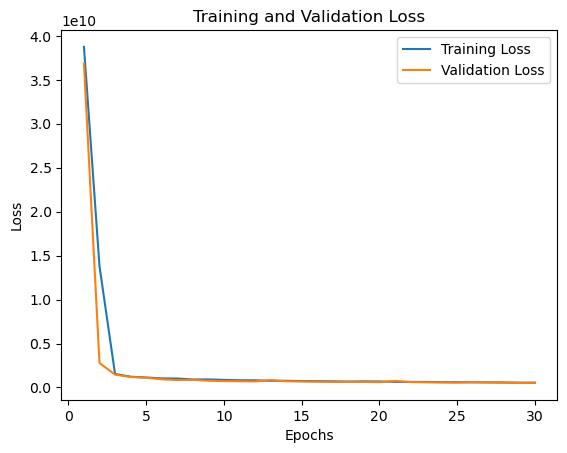

In [256]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the history object
# history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), batch_size=32)

# Extract training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss over epochs
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [236]:
df_test=df_copy.iloc[1460:,:]
df_test
X2=df_train.iloc[:,0:79]
X2.head(0)
processed_x = transform_x.fit_transform(X2)
processed_x
predictions = model.predict(processed_x)
pd.DataFrame(predictions)

46/46 [==============================] - 0s 5ms/step


,0
0,201129.906250
1,196052.312500
2,209897.015625
3,176966.906250
4,295697.500000
5,147123.968750
6,274973.031250
7,191563.312500
8,132907.203125
9,126523.859375
